In [1]:
!pip install -q datasets flash_attn timm einops bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 68.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into ac

In [3]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
import requests
import copy
%matplotlib inline

In [4]:
model_id = 'microsoft/Florence-2-large'

## HF Login

In [5]:
from huggingface_hub import notebook_login
notebook_login()

## Load model

In [6]:
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             trust_remote_code=True,
                                             device_map='cuda')
print(model)
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

Florence2ForConditionalGeneration(
  (vision_tower): DaViT(
    (convs): ModuleList(
      (0): ConvEmbed(
        (proj): Conv2d(3, 256, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (1): ConvEmbed(
        (proj): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (2): ConvEmbed(
        (proj): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      )
      (3): ConvEmbed(
        (proj): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      )
    )
    (blocks): ModuleList(
      (0): MySequential(
        (0): MySequential(
          (spatial_block): SpatialBlock(
            (conv1): PreNorm(
              (fn): De

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [7]:
def run_example(task_prompt, image):
    inputs = processor(text=task_prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

In [8]:
from PIL import Image

In [9]:
local_image_path = "radiolog report.jpg"

In [11]:
image = Image.open(local_image_path)

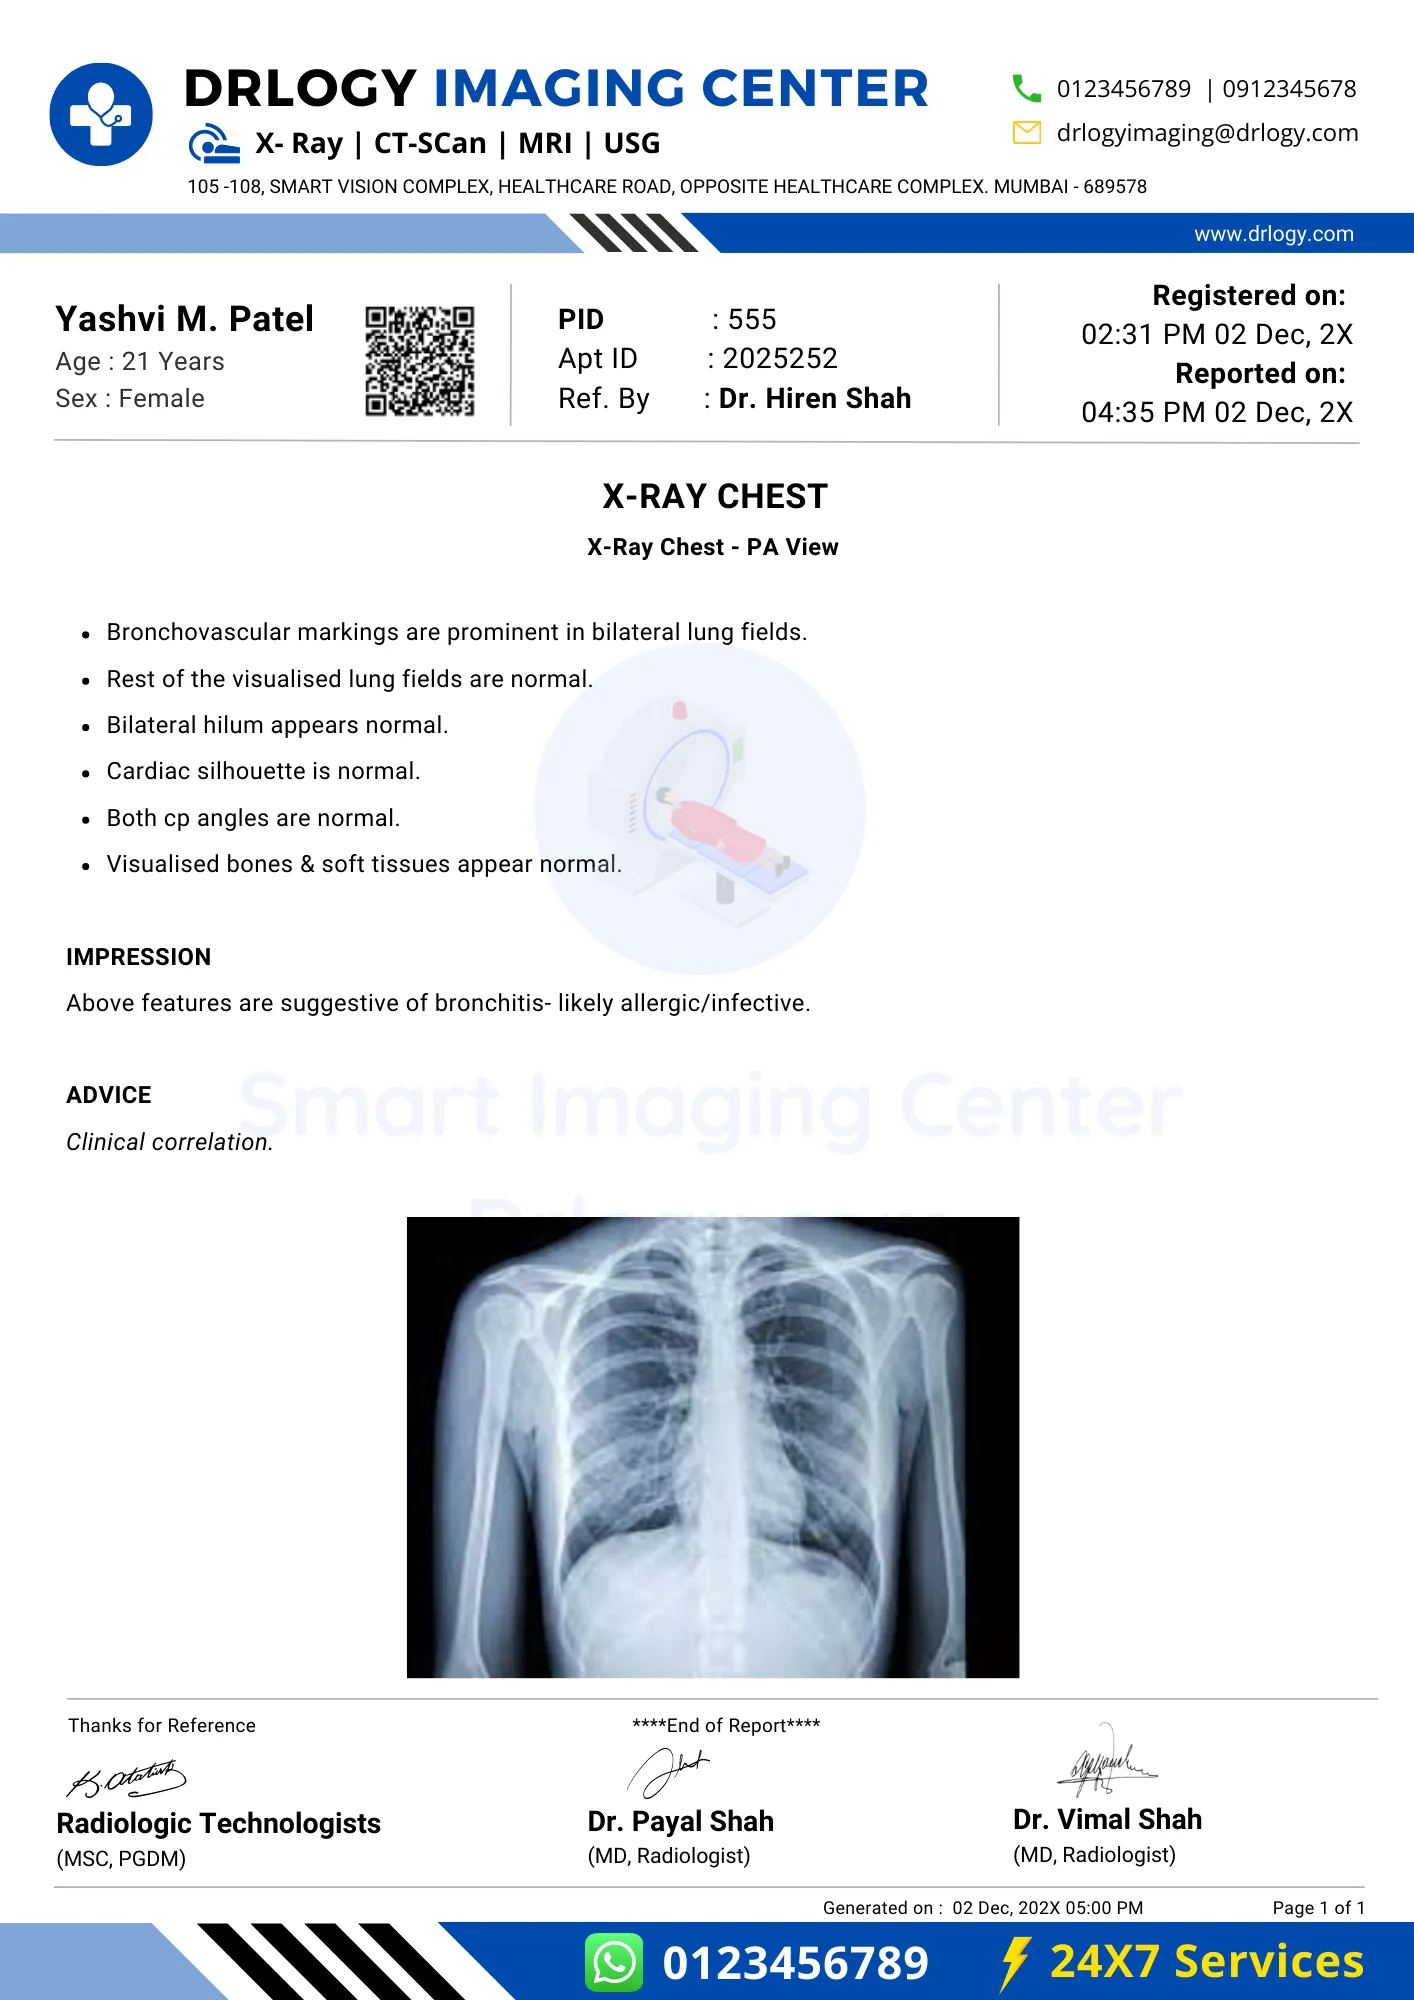

In [12]:
image

## Caption Task

In [13]:
task_prompt = '<CAPTION>'
run_example(task_prompt,image)

{'<CAPTION>': "x-ray chest x-ray image of a man's chest"}

## Detailed Caption

In [14]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt, image)

{'<DETAILED_CAPTION>': "The image shows a poster with an x-ray image of a man's chest, along with text, a barcode, and a QR code. The poster is likely advertising a radiology imaging center in Mumbai, as indicated by the text."}

#### To process the location tokens and render them on the image, the following method will be called to plot bounding boxes.

{'<OD>': {'bboxes': [[430.5630187988281, 1211.0, 973.5390014648438, 1685.0]], 'labels': ['person']}}


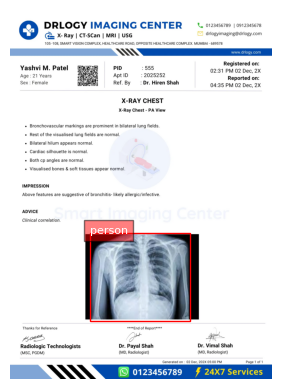

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

task_prompt = '<OD>'
results = run_example(task_prompt,image)
print(results)
plot_bbox(image, results['<OD>'])

## OCR

This function processes Florence-2's output to get the location tokens, used them to draw bounding boxes, and then writes the label corresponding to the bounding boxes, i.e., the text recognized through OCR.

In [17]:
def draw_ocr_bboxes(image, prediction):
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)
    display(image)

In [18]:
task_prompt = '<OCR>'
run_example(task_prompt,image)

{'<OCR>': 'DRLOGY IMAGING CENTER0123456789 | 012345678X-Ray | CT-Scan | MRI | USGdrlogyimaging@drology.com105-108, SMART VISION COMPLEX, HEALTHCARE ROAD, OPPOSITE HEALTHCARECOMPLEX, MUMBAI - 669578www.drilogy.comYashvi M. PatelPIDRegistered on:Age : 21 YearsApt ID: 202525202:31 PM 02 Dec, 2XSex : FemaleRef. By: Dr. Hiren ShahReported on:04:35 PM 02 December, 2XX-RAY CHESTX-RAY Chest - PA ViewBronchovascular markings are prominent in bilateral lung fields.. Rest of the visualised lung fields are normal.Bilateral hilium appears normal.Cardiac silhouette is normal.Both cp angles are normal.. Visualised bones & soft tissues appear normal.IMPRESSIONAbove features are suggestive of bronchitis-likely allergic/infective.ADVICESmart Imaging CenterClinical correlation.**** End of Report ***Thanks for ReferenceRadiologic TechnologistsDr. Payal ShahDr. Vimal Shah(MSC, PGDM)(MD, Radiologist)Generated on : 02.02.2022 05:00 PMPage 1 of 1012345678924X7 Services'}

{'<OCR_WITH_REGION>': {'quad_boxes': [[181.69900512695312, 63.0, 933.947021484375, 63.0, 933.947021484375, 111.0, 181.69900512695312, 111.0], [1055.551025390625, 73.0, 1360.9749755859375, 73.0, 1360.9749755859375, 103.0, 1055.551025390625, 103.0], [250.98500061035156, 125.0, 663.8729858398438, 125.0, 663.8729858398438, 159.0, 250.98500061035156, 159.0], [1055.551025390625, 119.0, 1362.3890380859375, 119.0, 1362.3890380859375, 149.0, 1055.551025390625, 149.0], [187.35501098632812, 173.0, 1150.2890625, 173.0, 1150.2890625, 197.0, 187.35501098632812, 197.0], [1192.708984375, 223.0, 1356.7330322265625, 223.0, 1356.7330322265625, 247.0, 1192.708984375, 247.0], [53.025001525878906, 299.0, 318.85699462890625, 299.0, 318.85699462890625, 335.0, 53.025001525878906, 335.0], [557.822998046875, 305.0, 605.8989868164062, 305.0, 605.8989868164062, 331.0, 557.822998046875, 331.0], [711.9490356445312, 305.0, 778.4070434570312, 305.0, 778.4070434570312, 331.0, 711.9490356445312, 331.0], [1150.2890625, 2

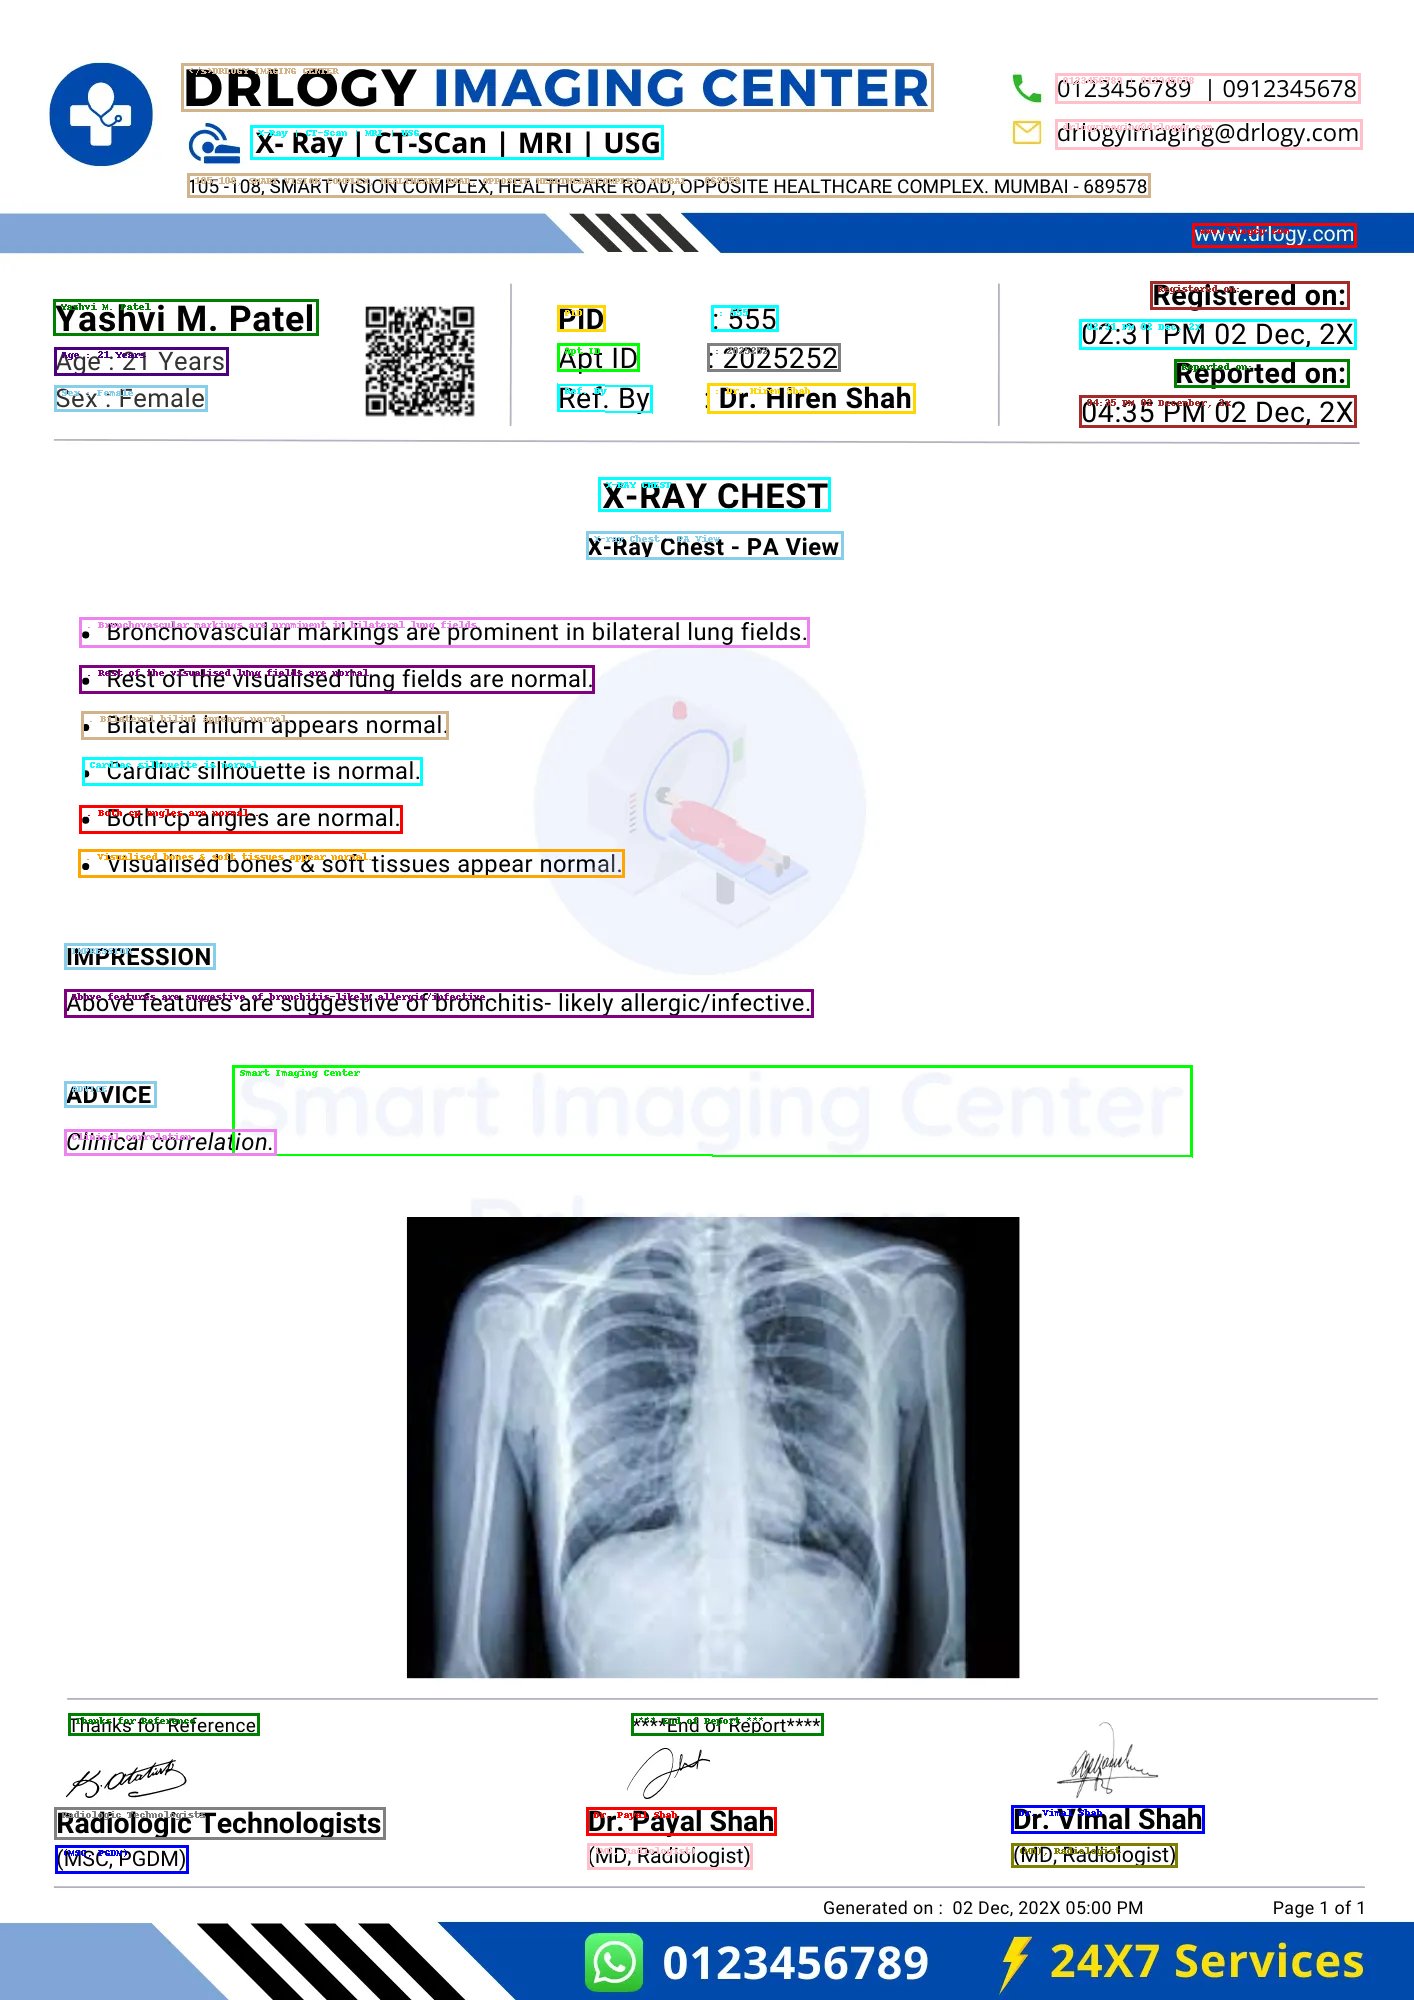

In [19]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt,image)
print(results)
output_image = copy.deepcopy(image)
draw_ocr_bboxes(output_image, results['<OCR_WITH_REGION>'])

## Fine Tuning

In [20]:
import torch
from PIL import Image
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModelForCausalLM, AutoProcessor, get_scheduler
from tqdm import tqdm
import numpy as np
from bitsandbytes.optim import AdamW

In [21]:
model.gradient_checkpointing_enable(gradient_checkpointing_kwargs={'use_reentrant':True})
for param in model.vision_tower.parameters():
  param.is_trainable = False

In [22]:
data = load_dataset("derek-thomas/ScienceQA")

Generating train split:   0%|          | 0/12726 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4241 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4241 [00:00<?, ? examples/s]

In [23]:
class MMInstructDataset(Dataset):

    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        example = self.data[idx]
        question = "<MMCHAT>"+example['question']+"\n\nAnswer:\n"
        choices = example['choices']
        answer = example['choices'][int(example['answer'])]
        if example['image'] is not None:
          image = example['image'].convert("RGB")
        else:
          zz = np.random.rand(50,50)
          image = Image.fromarray(zz).convert("RGB")
        return question, answer, image

In [24]:
def collate_fn(batch):
    questions, answers, images = zip(*batch)
    inputs = processor(text=list(questions), images=list(images), return_tensors="pt", padding=True).to("cuda")
    return inputs, answers

In [25]:
train_dataset = MMInstructDataset(data['train'])
val_dataset = MMInstructDataset(data['validation'])

batch_size = 1
gradient_accumulation_steps = 8
num_workers = 0

train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          collate_fn=collate_fn, num_workers=num_workers, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size,
                          collate_fn=collate_fn, num_workers=num_workers)

In [26]:
optimizer = AdamW(model.parameters(), lr=1e-6, optim_bits = 8, is_paged=True)

epochs = 2
num_training_steps = epochs * len(train_loader)

lr_scheduler = get_scheduler(name="linear", optimizer=optimizer,
                              num_warmup_steps=0, num_training_steps=num_training_steps,)

for epoch in range(epochs):
    model.train()
    train_loss = 0
    i = -1
    for inputs, answers in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):
        i += 1
        input_ids = inputs["input_ids"]
        pixel_values = inputs["pixel_values"]
        labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to("cuda")
        outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
        loss = outputs.loss/gradient_accumulation_steps
        loss.backward()
        if i % gradient_accumulation_steps == 0:
          optimizer.step()
          lr_scheduler.step()
          optimizer.zero_grad()
          train_loss += loss.item()
    avg_train_loss = train_loss / len(train_loader)
    print(f"Average Training Loss: {avg_train_loss}")

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{epochs}"):
            inputs, answers = batch
            input_ids = inputs["input_ids"]
            pixel_values = inputs["pixel_values"]
            labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to("cuda")
            outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

        print(val_loss / len(val_loader))

Training Epoch 1/2:   1%|          | 99/12726 [00:50<1:46:52,  1.97it/s]


KeyboardInterrupt: 

In [ ]:
model.save_pretrained("./florence_multimodal_finetuned/")